In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits() # 데이터셋 로드
features = digits.data # 특성 행렬을 만듭니다.
target = digits.target # 타깃 벡터를 만듭니다.
standardizer = StandardScaler() # 표준화 객체를 만듭니다.
logit = LogisticRegression() # # 로지스틱 회귀 객체를 만듭니다

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)
kf = KFold(n_splits=10, shuffle=True, random_state=1) # k-폴드 교차검증을 만듭니다. (10 개의 폴드를 만듬)

# k-폴드 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, features, target, cv=kf, # 교차 검증 기법
                            scoring="accuracy", # 평가 지표
                            n_jobs=-1) # 모든 CPU 코어 사용
print(cv_results.mean()) # 평균을 계산
print(cv_results) ## 10개 폴드의 점수를 모두 확인(평가 점수는 cv_results에 저장)

0.9693916821849783
[0.97777778 0.98888889 0.96111111 0.94444444 0.97777778 0.98333333
 0.95555556 0.98882682 0.97765363 0.93854749]


In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split( features, target, test_size=0.1, random_state=1)
standardizer.fit(features_train) # 훈련 세트로 standardizer의 fit 메서드를 호출

# 훈련 세트와 테스트 세트에 모두 적용합니다.
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

pipeline = make_pipeline(standardizer, logit) # 파이프라인을 만듭니다.

# k-폴드 교차 검증 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                            features, # 특성 행렬
                            target, # 타깃 벡터
                            cv=kf, # 교차검증
                            scoring="accuracy", # 평가 지표
                            n_jobs=-1) # 모든 CPU 코어 사용
cv_results.mean()

0.9693916821849783

In [3]:
#훈련 폴드로 50%, 테스트 폴드로 20%를 사용하여 10번 반복하는 실습입니다.
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기를 만듭니다.
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                            features, # 특성 행렬
                            target, # 타깃 벡터
                            cv=ss, # 교차 검증 기법
                            scoring="accuracy", # 평가 지표
                            n_jobs=-1) # 모든 CPU 코어 사용
cv_results.mean() # 평균을 계산합니다.

0.9630555555555554

In [5]:
# 훈련 폴드로 50%, 테스트 폴드로 20%를 사용하여 10번 반복하는 실습입니다
# 사이킷런에서 교차 검증을 반복하여 실행할 수 있는 RepeatedKFold 와 StratifiedRepeatedKFold
# n_splits 매개변수 기본값은 5이고 n_repeats 매개변수 기본값은 10입니다.

from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 객체 생성
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                            features, # 특성 행렬
                            target, # 타깃 벡터
                            cv=rfk, # 교차 검증 기법
                            scoring="accuracy", # 평가 지표
                            n_jobs=-1) # 모든 CPU 코어 사용

len(cv_results) # 검증 점수 개수를 확인

50

In [6]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

boston = load_boston() # 데이터를 로드
features, target = boston.data, boston.target # 특성을 만듭니다.

features_train, features_test, target_train, target_test = train_test_split(
     features, target, random_state=0) # 훈련 세트와 테스트 세트를 나눕니다.

dummy = DummyRegressor(strategy='mean') # 더미 회귀 모델을 만듭니다.

dummy.fit(features_train, target_train) # 더미 회귀 모델을 훈련합니다.

print(dummy.score(features_test, target_test)) # R^2 점수를 계산합니다.

-0.001119359203955339


In [7]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression() # 간단한 선형 회귀 모델을 훈련
ols.fit(features_train, target_train)

print(ols.score(features_test, target_test)) # R^2 점수를 계산

# 모든 샘플에 대해 20으로 예측하는 더미 회귀 모델을 만듭니다.
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

print(clf.score(features_test, target_test)) # 점수를 계산

0.6354638433202104
-0.06510502029325727


In [8]:
clf = DummyRegressor(strategy='quantile', quantile=1.0)
clf.fit(features_train, target_train) 

# 훈련 세트 타깃의 최대값으로 예측합니다.
print(clf.predict(features_test))

import numpy as np
# 훈련 세트의 타깃에서 최댓값을 확인합니다.
print(np.max(target_train))

[50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50.]
50.0


In [9]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

iris = load_iris() # 데이터 로드
features, target = iris.data, iris.target # 타깃 벡터와 특성 행렬을 만듭니다.

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split( features, target, random_state=0)

# 더미 분류 모델을 만듭니다.
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(features_train, target_train) # 모델 훈련
dummy.score(features_test, target_test) # 정확도 점수를 계산

0.42105263157894735

In [10]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier() # 분류 모델을 만듭니다.
classifier.fit(features_train, target_train) # 모델 훈련
print(classifier.score(features_test, target_test)) # 정확도 점수를 계산

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)

# 훈련 세트 타깃에서 가장 많은 값으로 예측합니다.
print(dummy.predict(features_test))

0.9736842105263158
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
X, y = make_classification(n_samples = 10000,
                            n_features = 3,
                            n_informative = 3,
                            n_redundant = 0,
                            n_classes = 2,
                            random_state = 1)

logit = LogisticRegression() # 로지스틱 회귀 모델을 만듭니다

cross_val_score(logit, X, y, scoring="accuracy") # 정확도를 사용하여 교차검증을 수행합니다

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [13]:
# 정밀도를 사용한 교차검증
print(cross_val_score(logit, X, y, scoring="precision"))

# 재현율을 사용한 교차검증
print(cross_val_score(logit, X, y, scoring="recall"))

# f1 점수를 사용한 교차검증
print(cross_val_score(logit, X, y, scoring="f1"))

[0.95963673 0.94820717 0.9635996  0.96149949 0.96060606]
[0.951 0.952 0.953 0.949 0.951]
[0.95529884 0.9500998  0.95827049 0.95520886 0.95577889]


In [15]:
#y값과 예측한 y값을 이용하여 직접 정확도와 재현율 계산
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# 테스트 세트의 예측을 만듭니다.
y_hat = logit.fit(X_train, y_train).predict(X_test)

# 정확도를 계산합니다.
print(accuracy_score(y_test, y_hat))

from sklearn.model_selection import cross_validate
# 정확도와 정밀도를 사용한 교차검증
cross_validate(logit, X, y, scoring=["accuracy", "precision"])

0.947


{'fit_time': array([0.01199198, 0.01099443, 0.00999379, 0.00999379, 0.00999284]),
 'score_time': array([0.00199866, 0.00099921, 0.0019989 , 0.00199866, 0.00199866]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

In [16]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples=10000,
                n_features=10, n_classes=2, n_informative=3, random_state=3)

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

logit = LogisticRegression() # 분류기를 만듭니다.
logit.fit(features_train, target_train) # 모델을 훈련합니다.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

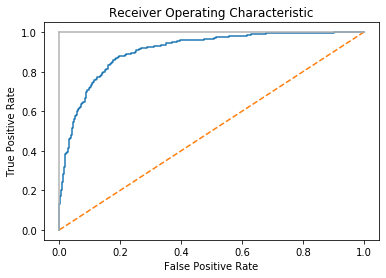

In [19]:
# 예측 확률 계산
target_probabilities = logit.predict_proba(features_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# ROC 곡선을 그립니다.
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [20]:
# 예측 확률을 계산합니다.
logit.predict_proba(features_test)[0:1]
logit.classes_

print("임계값:", threshold[116])
print("진짜 양성 비율:", true_positive_rate[116])
print("거짓 양성 비율:", false_positive_rate[116])

print("임계값:", threshold[45])
print("진짜 양성 비율:", true_positive_rate[45])
print("거짓 양성 비율:", false_positive_rate[45])

# ROC 곡선 아래 면적을 계산합니다.
roc_auc_score(target_test, target_probabilities)

임계값: 0.5331715230155317
진짜 양성 비율: 0.810204081632653
거짓 양성 비율: 0.14901960784313725
임계값: 0.8189133876659292
진짜 양성 비율: 0.5448979591836735
거짓 양성 비율: 0.047058823529411764


0.9073389355742297

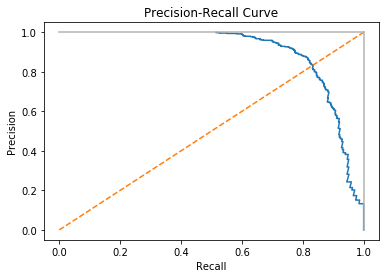

0.8984128719848977


{'fit_time': array([0.01199198, 0.00899482, 0.00899482, 0.00899458, 0.00899458]),
 'score_time': array([0.0019989 , 0.00199842, 0.00199842, 0.0019989 , 0.0019989 ]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}

In [24]:
from sklearn.metrics import precision_recall_curve
# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
precision, recall, threshold = precision_recall_curve(
	target_test, target_probabilities)

# ROC 곡선을 그립니다.
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0, 1], ls="--")
plt.plot([1, 1], c=".7"), plt.plot([1, 1], [1, 0] , c=".7")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

from sklearn.metrics import average_precision_score
# 평균 정밀도를 계산합니다.
print(average_precision_score(target_test, target_probabilities))
#scoring매개변수에 ROCAUC와 평균 정밀도를 평가 지표로 지정 할 수 있습니다.
cross_validate(logit, features, target, scoring=["roc_auc", "average_precision"])

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples = 10000,
                                        n_features = 3,
                                        n_informative = 3,
                                        n_redundant = 0,
                                        n_classes = 3,
                                        random_state = 1)

logit = LogisticRegression() # 로지스틱 회귀 모델 객체 생성

# 정확도를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [26]:
# 마크로 평균 F1 점수를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris()      # 데이터 로드
features = iris.data             # 특성 행렬
target = iris.target             # 타깃 벡터
class_names = iris.target_names  # 클래스 이름 리스트

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

classifier = LogisticRegression() # 로지스틱 회귀 모델 객체 생성

# 모델을 훈련하고 예측 결과를 계산합니다.
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


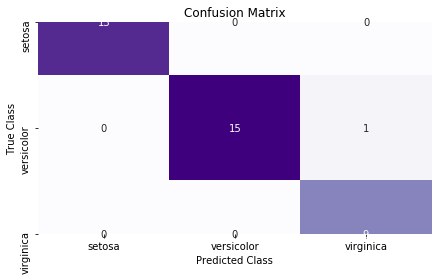

In [33]:
# 오차 행렬을 만듭니다.
matrix = confusion_matrix(target_test, target_predicted)

# 판다스 데이터프레임을 만듭니다.
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Purples") # 히트맵 생성
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, target_predicted)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [37]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                    n_features = 3,
                                    n_informative = 3,
                                    n_targets = 1,
                                    noise = 50,
                                    coef = False,
                                    random_state = 1)

ols = LinearRegression() # 객체 생성

# 음의 MSE를 사용한 교차검증을 수행합니다.
print(cross_val_score(ols, features, target, scoring='neg_mean_squared_error'))

# R^2를 사용한 교차검증을 수행합니다.
print(cross_val_score(ols, features, target, scoring='r2'))

[-1974.65337976 -2004.54137625 -3935.19355723 -1060.04361386
 -1598.74104702]
[0.8622399  0.85838075 0.74723548 0.91354743 0.84469331]


In [38]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples = 1000,
                        n_features = 10,
                        centers = 2,
                        cluster_std = 0.5,
                        shuffle = True,
                        random_state = 1) # 특성 행렬을 생성

# k-평균을 사용하여 데이터를 클러스터링하고 클래스를 예측합니다.
model = KMeans(n_clusters=2, random_state=1).fit(features)

target_predicted = model.labels_ # 예측된 클래스

silhouette_score(features, target_predicted) # 모델 평가

0.8916265564072142

In [40]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                    n_features = 3,
                                    random_state = 1)

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.10, random_state=1)

def custom_metric(target_test, target_predicted): # 사용자 정의 지표 함수를 정의
    r2 = r2_score(target_test, target_predicted) # R^2 점수를 계산
    return r2 # R^2 점수를 반환

# 높은 점수가 좋은 것을 나타내는 스코어 함수를 만듭니다.
score = make_scorer(custom_metric, greater_is_better=True)
classifier = Ridge() # 릿지(ridge) 회귀 모델 객체 생성

model = classifier.fit(features_train, target_train) # 릿지 회귀 모델 훈련
score(model, features_test, target_test) # 사용자 정의 스코어 함수를 적용

target_predicted = model.predict(features_test) # 예측

r2_score(target_test, target_predicted) # R^2 점수 계산

0.9997906102882058

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits() # 데이터 로드
features, target = digits.data, digits.target # 특성 행렬과 타깃 벡터 분리

# 다양한 훈련 세트 크기에서 교차검증 훈련 점수와 테스트 점수를 계산합니다.
train_sizes, train_scores, test_scores = learning_curve(
                                            RandomForestClassifier(), # 분류기
                                            features, # 특성 행렬
                                            target, # 타깃 벡터
                                            cv=10, # 폴드 수
                                            scoring='accuracy', # 성능 지표
                                            n_jobs=-1, # 모든 코어 사용
                                            train_sizes=np.linspace( 0.01, 1.0, 50)) # 50개의 훈련 세트 크기

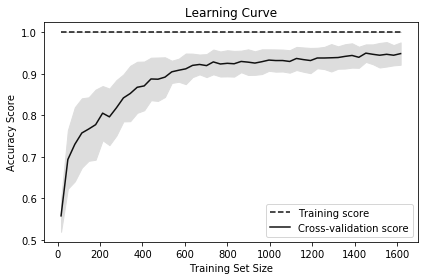

In [42]:
# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 그래프를 그립니다.
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# 표준 편차 영역을 그립니다.
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# 그래프를 출력합니다.
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#훈련 세트 샘플의 1%에서 100%까지 50개 크기에서 랜덤 포레스트 분류기의 정확도를 그래프로 출력합니다.
#모델의 교차검증 정확도가 증가하면 추가적인 샘플이 도움이 된다는 것을 의미합니다.

In [44]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()     # 데이터 로드
features = iris.data            # 특성 행렬
target = iris.target            # 타깃 벡터
class_names = iris.target_names # 타깃 클래스 이름의 리스트

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split( features, target, random_state=1)
classifier = LogisticRegression()      # 로지스틱 회귀 모델 객체 생성
model = classifier.fit(features_train, target_train)    # 모델 훈련
target_predicted = model.predict(features_test)     # 예측

print(classification_report(target_test,
                        target_predicted,
                        target_names=class_names))   # 분류 리포트 생성

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
# 분류 리포트를 만듭니다.
print(classification_report(target_test, target_predicted, labels=[0,1,2,3]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9
           3       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97        38
   macro avg       0.72      0.73      0.73        38
weighted avg       0.98      0.97      0.97        38



C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


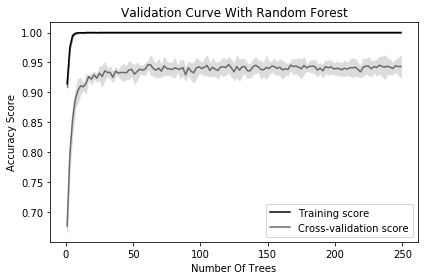

In [49]:
#실습 : 트리 개수가 증가할 때 랜덤 포레스트 분류기의 훈련 세트 정확도와 교차검증 정확도의 변화를 시각화
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = load_digits() # 데이터 로드
features, target = digits.data, digits.target # 특성 행렬과 타깃 벡터
param_range = np.arange(1, 250, 2) # 파라미터 값의 범위

# 파라미터 값의 범위를 사용하여 훈련 세트와 테스트 세트의 정확도를 계산합니다.
train_scores, test_scores = validation_curve( RandomForestClassifier(), # 분류기
                                                features, # 특성 행렬
                                                target, # 타깃 벡터
                                                param_name="n_estimators", # 조사할 하이퍼파라미터
                                                param_range=param_range, # 하이퍼파라미터 값의 범위
                                                cv=3, # 폴드 수
                                                scoring="accuracy", # 성능 지표
                                                n_jobs=-1) # 모든 코어 사용 

train_mean = np.mean(train_scores, axis=1) # 훈련 세트 점수의 평균과 표준 편차를 계산
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1) # 테스트 세트 점수의 평균과 표준 편차를 계산
test_std = np.std(test_scores, axis=1)

 # 훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로 그립니다.
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# 훈련 세트와 테스트 세트의 정확도에 대한 표준 편차를 그래프로 그립니다.
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show() # 그래프 출력